In [61]:
from functools import lru_cache
@lru_cache
def data_train():
    def data_split():
        import pandas as pd
        import numpy as np
        from pathlib import Path
        imput_directory = Path('/Users/raashidkhan/Desktop/GitHub-Projects/MNIST_Classification/data')
        output_directory = Path('/Users/raashidkhan/Desktop/GitHub-Projects/MNIST_Classification/outputs')
        X=pd.read_csv(imput_directory/'mnist_data.csv').to_numpy()
        y=pd.read_csv(imput_directory/'mnist_target.csv').to_numpy().ravel()
        X_train,y_train,X_test,y_test=X[:60000],y[:60000],X[60000:],y[60000:]
        return X_train,y_train,X_test,y_test
    def training_data():
        X_train,y_train,_,_,=data_split()
        from sklearn.linear_model import SGDClassifier
        model=SGDClassifier(random_state=42)
        model.fit(X_train,y_train==5)
        return model
    def data_eval():
        model=training_data()
        X_train,y_train,_,_=data_split()
        predictions=model.predict(X_train)
        import pandas as pd
        return pd.DataFrame(predictions),X_train,y_train,model
    return data_eval()



In [62]:
X,X_train,y_train,model=data_train()
print (X)

           0
0      False
1      False
2      False
3      False
4      False
...      ...
59995  False
59996   True
59997  False
59998  False
59999  False

[60000 rows x 1 columns]


In [63]:
import pandas as pd
comparison_df=pd.DataFrame({'Predictions':(X.to_numpy().ravel()),'Actual':(y_train==5)})
comparison_df


,Predictions,Actual
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
59995,False,False
59996,True,True
59997,False,False
59998,False,False


In [64]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train==5,X)
print("Training Accuracy:", accuracy)
#It says that the training accuracy is almost 90%
#But even if all the predictions of 5 are wrong, the accuracy will still be 90% because only 10% 
#of the images are of 5s in the training set.

Training Accuracy: 0.9639333333333333


In [65]:
#So, we use recall, precision and F1 score to evaluate the model better.

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

In [67]:
preds=X.to_numpy().ravel()
confusion_matrix(y_train==5,preds)

array([[53338,  1242],
       [  922,  4498]])

In [68]:
print ('Precision Score:',precision_score(y_train==5,X))
print ('Recall Score:',recall_score(y_train==5,X))
print ('F1 Score:',f1_score(y_train==5,X))

Precision Score: 0.783623693379791
Recall Score: 0.8298892988929889
F1 Score: 0.8060931899641577


In [69]:
#Now, we can tune the decision threshold to improve precision or recall as needed.

In [83]:
print ('Maximum Decision Score:', model.decision_function(X_train).max())
print ('Minimum Decision Score:', model.decision_function(X_train).min())
print ('Mean Decision Score:', model.decision_function(X_train).mean())
raw_decision_scores=model.decision_function(X_train)


#For models like SVMs, Logistic Regression (Scikit-learn), Linear SVM, etc.:
#Each sample is given a score.
#If the score is > 0, the model predicts positive class (1).
#If the score is < 0, the model predicts negative class (0 or –1).

Maximum Decision Score: 19146.40353833752
Minimum Decision Score: -70888.19325767749
Mean Decision Score: -7349.015882443269


In [84]:
precision, recall, thresholds = precision_recall_curve(y_train==5,raw_decision_scores)
print ('Precision', precision)
print ('Recall', recall)
print ('Thresholds', thresholds)

Precision [0.09033333 0.09033484 0.09033634 ... 1.         1.         1.        ]
Recall [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.69003690e-04
 1.84501845e-04 0.00000000e+00]
Thresholds [-70888.19325768 -66777.41258389 -66295.70099068 ...  17233.09322215
  18208.81638585  19146.40353834]



THRESHOLD (your decision boundary)
What it is?
A single cutoff value used to convert scores into class labels.

Properties
1. One value, not an array
2. You choose it (model doesn’t learn it)
3. Default:
    #Logistic regression → 0.5 probability
    #SVM → 0 score
4. Used to turn scores into 0/1 predictions

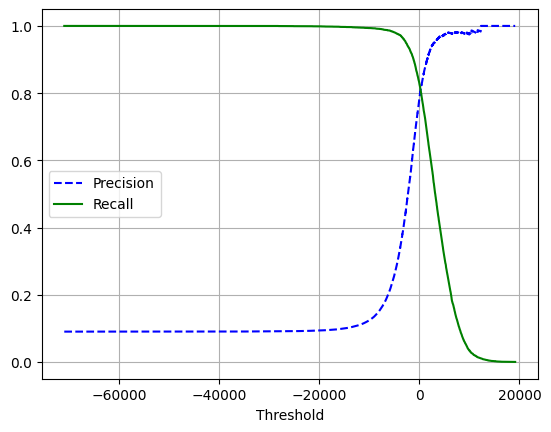

In [85]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

In [82]:
thresholds

array([-70888.19325768, -66777.41258389, -66295.70099068, ...,
        17233.09322215,  18208.81638585,  19146.40353834], shape=(60000,))

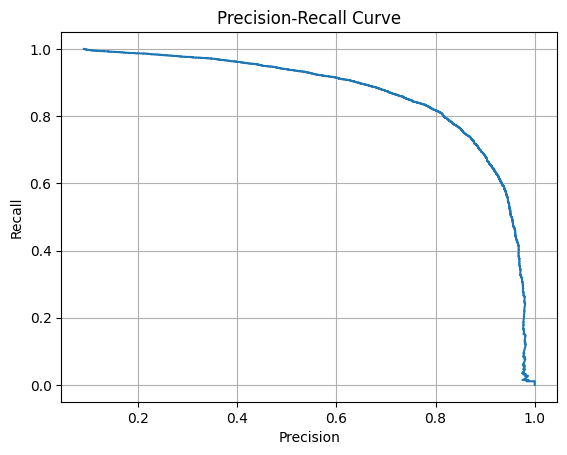

In [87]:
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [88]:
#Here I can see that the best thing would be to choose a threshold at precision of 80% or 90% 
#depending on whether I want to prioritize precision or recall.